In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Part A: Fill missing entries with mode

In [2]:
data = pd.read_csv("titanic_training.csv")
data.drop(['cabin','ticket'], axis = 1, inplace =True)

In [3]:
for col in data.columns:
    print("Mode - "+ col +": ", data[col].mode()[0])
    data[col].fillna(data[col].mode()[0], inplace = True)

Mode - survived:  0.0
Mode - pclass:  3.0
Mode - sex:  male
Mode - age:  22.0
Mode - sibsp:  0.0
Mode - parch:  0.0
Mode - fare:  8.05
Mode - embarked:  S


In [4]:
data.head()

survived  pclass   sex   age  sibsp  parch      fare embarked
0       0.0     3.0  male  22.0    0.0    0.0    8.0500        S
1       0.0     1.0  male  22.0    0.0    0.0  135.6333        C
2       0.0     2.0  male  23.0    0.0    0.0   15.0458        C
3       0.0     2.0  male  42.0    0.0    0.0   13.0000        S
4       0.0     3.0  male  20.0    0.0    0.0    9.8458        S

# Part B: Encoding and train/test split

In [5]:
le = LabelEncoder()
ohe = OneHotEncoder()
data['sex'] = data['sex'].astype('category')
data['embarked'] = data['embarked'].astype('category')
data['sex_category'] = le.fit_transform(data['sex'])
data['embarked_category'] = le.fit_transform(data['embarked'])
sex = pd.DataFrame(ohe.fit_transform(data[['sex_category']]).toarray())
embarked = pd.DataFrame(ohe.fit_transform(data[['embarked_category']]).toarray())
sibsp = pd.DataFrame(ohe.fit_transform(data[['sibsp']]).toarray())
parch = pd.DataFrame(ohe.fit_transform(data[['parch']]).toarray())
pclass = pd.DataFrame(ohe.fit_transform(data[['pclass']]).toarray())

#update all the column names
sex.columns = ['female','male']
embarked.columns = ['Cherbourg', 'Queenstown', 'Southhampton']
sibsp.columns = ['s_0', 's_1', 's_2', 'sibsp_3', 's_4', 's_5', 's_8']
parch.columns = ['p_0', 'p_1','p_2','p_3','p_4','p_5','p_6', 'p_9']
pclass.columns = ['upper', 'middle', 'lower']

data_cleaned = data.join([pclass, sex, sibsp, parch, embarked])
data_cleaned.head()

survived  pclass   sex   age  sibsp  parch      fare embarked  \
0       0.0     3.0  male  22.0    0.0    0.0    8.0500        S   
1       0.0     1.0  male  22.0    0.0    0.0  135.6333        C   
2       0.0     2.0  male  23.0    0.0    0.0   15.0458        C   
3       0.0     2.0  male  42.0    0.0    0.0   13.0000        S   
4       0.0     3.0  male  20.0    0.0    0.0    9.8458        S   

   sex_category  embarked_category  ...  p_1  p_2  p_3  p_4  p_5  p_6  p_9  \
0             1                  2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             1                  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2             1                  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             1                  2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4             1                  2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   Cherbourg  Queenstown  Southhampton  
0        0.0         0.0           1.0  
1        1.0         0.0           0.0  
2        1.0         0.0           0.0  
3        0.0         0.0           1.0  
4        0.0         0.0           1.0  

[5 rows x 33 columns]

In [6]:
X = data_cleaned.drop(['survived'], axis=1).drop(['pclass','sex','sibsp','parch','embarked','sex_category','embarked_category'],axis =1)
y = data_cleaned['survived']

In [7]:
X.head(5)

age      fare  upper  middle  lower  female  male  s_0  s_1  s_2  ...  \
0  22.0    8.0500    0.0     0.0    1.0     0.0   1.0  1.0  0.0  0.0  ...   
1  22.0  135.6333    1.0     0.0    0.0     0.0   1.0  1.0  0.0  0.0  ...   
2  23.0   15.0458    0.0     1.0    0.0     0.0   1.0  1.0  0.0  0.0  ...   
3  42.0   13.0000    0.0     1.0    0.0     0.0   1.0  1.0  0.0  0.0  ...   
4  20.0    9.8458    0.0     0.0    1.0     0.0   1.0  1.0  0.0  0.0  ...   

   p_1  p_2  p_3  p_4  p_5  p_6  p_9  Cherbourg  Queenstown  Southhampton  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0         0.0           1.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0        1.0         0.0           0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0        1.0         0.0           0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0         0.0           1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0         0.0           1.0  

[5 rows x 25 columns]

In [8]:
display(y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    1.0
997    0.0
998    0.0
999    0.0
Name: survived, Length: 1000, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state = 1)

## Part C: Decision trees of depth 3 - gini and information gain

In [10]:
dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1).fit(X_train, y_train)
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1).fit(X_train, y_train)

In [11]:
print("Training Accuracy with Gini: ", dt_gini.score(X_train, y_train))
print("Test Accuracy with Gini: ",dt_gini.score(X_test, y_test))

Training Accuracy with Gini:  0.8325
Test Accuracy with Gini:  0.74


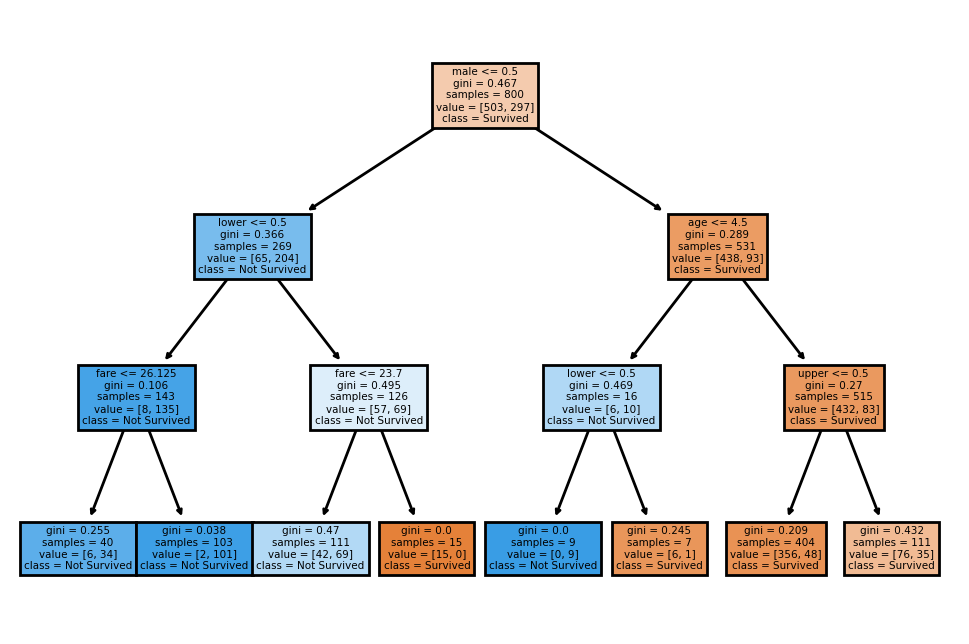

In [12]:
fig, axes = plt.subplots(dpi = 200)
tree.plot_tree(dt_gini, class_names = ["Survived", "Not Survived"],feature_names = X.columns, filled = True)
plt.show()

In [13]:
print("Training Accuracy with Entropy: ", dt_entropy.score(X_train, y_train))
print("Test Accuracy with Entropy: ",dt_entropy.score(X_test, y_test))

Training Accuracy with Entropy:  0.825
Test Accuracy with Entropy:  0.75


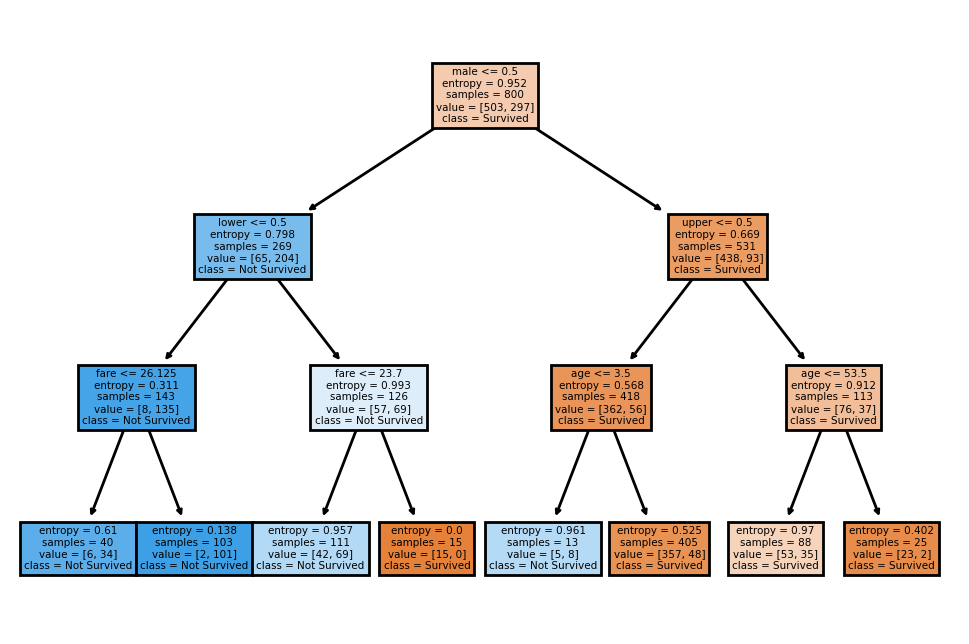

In [14]:
fig, axes = plt.subplots(dpi = 200)
tree.plot_tree(dt_entropy, class_names = ["Survived", "Not Survived"],feature_names = X.columns, filled = True)
plt.show()

Notice there are differences in the actual decision trees, although they have similar performance. The right half of the tree splits on different parameters. Therefore, decision trees are not extremely stable for this problem, and so we should likely not put too much stock in concrete interpretations of the splits.

# Part D: decision tree of depth 4, default parameters

In [15]:
dt_depth4 = DecisionTreeClassifier(max_depth=4, random_state=123).fit(X_train, y_train)

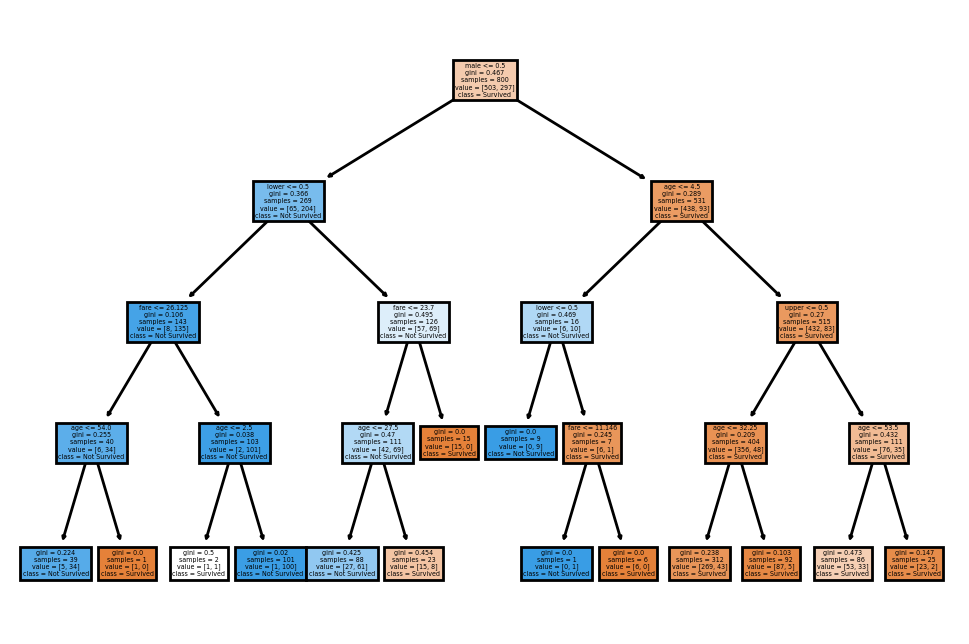

In [16]:
fig, axes = plt.subplots(dpi = 200)
tree.plot_tree(dt_depth4, class_names = ["Survived", "Not Survived"],feature_names = X.columns, filled = True)
plt.show()

In [17]:
print("Training Accuracy with decision tree of depth 4: ", dt_depth4.score(X_train, y_train))
print("Test Accuracy decision tree of depth 4: ", dt_depth4.score(X_test, y_test))

Training Accuracy with decision tree of depth 4:  0.84375
Test Accuracy decision tree of depth 4:  0.735


# Part E: Random Forest

In [18]:
rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)

In [19]:
print("Training Accuracy with Random Forest default: ", rf.score(X_train, y_train))
print("Test Accuracy with Random Forest default: ", rf.score(X_test, y_test))

Training Accuracy with Random Forest default:  0.975
Test Accuracy with Random Forest default:  0.735


In [20]:
param_range = range(5,1000,10)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, 
                                             param_name='max_depth', param_range=param_range,
                                             scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

In [21]:
print("Max_Depth:" , param_range)
print("Mean Test Scores are ", test_scores_mean)
print("Mean Train Scores are ", train_scores_mean)

Max_Depth: range(5, 1000, 10)
Mean Test Scores are  [0.815   0.76    0.75875 0.76875 0.765   0.75875 0.76    0.7525  0.755
 0.76875 0.75875 0.76625 0.75625 0.75625 0.76    0.7625  0.75625 0.755
 0.7475  0.76125 0.75375 0.76125 0.75875 0.765   0.76    0.755   0.765
 0.755   0.7625  0.75875 0.76    0.76125 0.765   0.76125 0.7575  0.76125
 0.7625  0.76    0.75625 0.7625  0.755   0.75625 0.76125 0.7525  0.75625
 0.76    0.7525  0.76    0.7575  0.7625  0.76375 0.75875 0.765   0.75875
 0.755   0.75125 0.7625  0.7625  0.75875 0.75375 0.76    0.76375 0.75625
 0.7625  0.76375 0.75375 0.75625 0.75625 0.76625 0.755   0.76125 0.7625
 0.765   0.76375 0.7525  0.75125 0.75875 0.76375 0.76125 0.7575  0.75625
 0.76125 0.76    0.76125 0.76    0.75875 0.7625  0.76625 0.75875 0.7625
 0.7625  0.75625 0.755   0.7625  0.76625 0.75625 0.7575  0.75875 0.76375
 0.765  ]
Mean Train Scores are  [0.854375  0.9690625 0.9778125 0.9778125 0.9778125 0.9778125 0.9778125
 0.9778125 0.9778125 0.9778125 0.9778125 0.977812

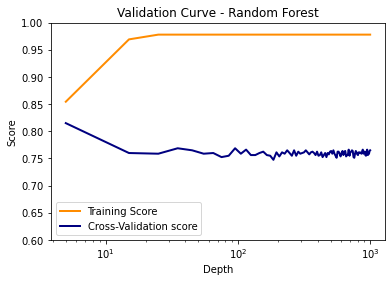

In [22]:
plt.title("Validation Curve - Random Forest")
plt.xlabel("Depth")
plt.ylabel("Score")

plt.ylim(0.6, 1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-Validation score", color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [23]:
max_depth_best = param_range[np.argsort(test_scores_mean)[-1]]
print("The best depth: ", max_depth_best)
rf1 = RandomForestClassifier(random_state=0, max_depth = max_depth_best).fit(X_train, y_train)
acc_train = rf1.score(X_train, y_train)
acc_test = rf1.score(X_test, y_test)
print('Training accuracy:', acc_train)
print('Test accuracy:', acc_test)

The best depth:  5
Training accuracy: 0.845
Test accuracy: 0.745


In [24]:
error={}

for i in range(5,1000):
    rf_i = RandomForestClassifier(random_state=0, max_depth = 5, n_estimators = i).fit(X_train,y_train)
    #print(rf_i.score(X_train,y_train))
    error[i] = 1 - rf_i.score(X_test,y_test)

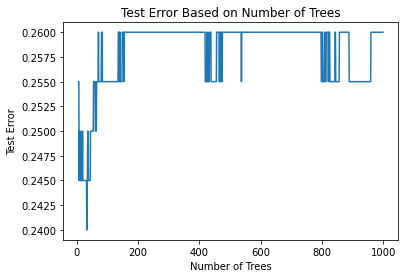

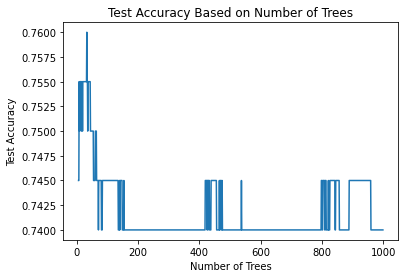

In [25]:
plt.title("Test Error Based on Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Test Error")
plt.plot(error.keys(),error.values())
plt.show()
plt.title("Test Accuracy Based on Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Test Accuracy")
accuracy = [(1-i) for i in error.values()]
plt.plot(error.keys(),accuracy)
plt.show()

It is clear from the graph below that overfitting is a problem since the error curve rises with the increase number of trees and the training accuracy is very high when the test accuracy is much lower. This could be due to the complexity of the data since we had filled in a lot of the missing values and the data itself is skewed for survivors.